# Topic 3: Huấn luyện mô hình ML
Công ty C muốn sử dụng ML để đánh giá ý định mua sắm của khác hàng dựa vào các dữ liệu đã thu thập được.
Dữ liệu: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
Hãy huấn luyện mô hình ML để đạt được dự đoán F1-score là tốt nhất có thể.
Yêu cầu:
- Đánh giá kết quả trung bình F1 score trên bộ dữ liệu trên với KFOLD (K=5)
- Sử dụng tối thiểu 3 mô hình khác nhau để so sánh kết quả trung bình F1-score


In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468)

# data (as pandas dataframes)
X = online_shoppers_purchasing_intention_dataset.data.features
y = online_shoppers_purchasing_intention_dataset.data.targets

# metadata
print(online_shoppers_purchasing_intention_dataset.metadata)

# variable information
print(online_shoppers_purchasing_intention_dataset.variables)




{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
import seaborn as sns
from sklearn.metrics import classification_report

# Tiền xử lý đầu vào
Dùng StandardScaler hoặc MinMaxScaler đều được, chưa thử kết hợp Pipeline.

In [4]:
df=pd.DataFrame()

In [5]:

df = X[['Month', 'VisitorType']].copy()

df = pd.get_dummies(df, columns=['Month'])
df = pd.get_dummies(df, columns=['VisitorType'])


In [6]:
X = pd.get_dummies(X, columns=['Month', 'VisitorType'])

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

# Compare model by PyCaret
So sánh các model bằng compare model trong Pycaret với dữ liệu đầu vào chưa tiền xử lý, sau đó lựa chọn các model tối ưu nhất để training và lấy f1-score.

In [9]:
!pip install pycaret

In [10]:
from pycaret.classification import setup, compare_models

In [11]:
df = X.copy()
df['Revenue'] = y

In [12]:
model_setup = setup(data=df, target='Revenue', session_id=123,fold=5)

,Description,Value
0,Session id,123
1,Target,Revenue
2,Target type,Binary
3,Original data shape,"(12330, 29)"
4,Transformed data shape,"(12330, 29)"
5,Transformed train set shape,"(8631, 29)"
6,Transformed test set shape,"(3699, 29)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


In [13]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9028,0.9278,0.6018,0.7242,0.6569,0.6009,0.6046,1.9780
gbc,Gradient Boosting Classifier,0.9011,0.9292,0.6056,0.7130,0.6545,0.5972,0.6002,1.3820
rf,Random Forest Classifier,0.9009,0.9244,0.5427,0.7494,0.6291,0.5736,0.5838,1.6100
xgboost,Extreme Gradient Boosting,0.8943,0.9174,0.5719,0.6916,0.6257,0.5649,0.5685,0.3160
et,Extra Trees Classifier,0.8932,0.9158,0.4506,0.7621,0.5660,0.5097,0.5328,1.3220
ada,Ada Boost Classifier,0.8887,0.9115,0.5584,0.6678,0.6080,0.5438,0.5468,1.1520
lr,Logistic Regression,0.8843,0.8872,0.3870,0.7419,0.5081,0.4498,0.4808,3.6860
lda,Linear Discriminant Analysis,0.8795,0.8983,0.3361,0.7454,0.4629,0.4059,0.4471,0.0700
svm,SVM - Linear Kernel,0.8790,0.6047,0.3330,0.7732,0.4374,0.3868,0.4402,0.4320
ridge,Ridge Classifier,0.8723,0.8987,0.2410,0.7870,0.3686,0.3192,0.3895,0.1120


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [14]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


=> *Ở đây ta thấy LightGBM, GBC, RF là các model (f1-score cao nhất) tốt nhất, sau đó là SVM,KNN và Logistic Regression*

*=> Ta chọn 6 model trên để tiền xử lý dữ liệu đầu vào,với kfold=5 để được f1-score tốt nhất*

# Random Forest

In [15]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [16]:
for train_index, test_index in kf.split(X_scaled,y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [17]:
RFclf = RandomForestClassifier(max_depth=10, random_state=0)
RFclf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=None,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

**F1-score trong Classification report**

In [18]:
class_name=np.unique(y_train).astype(str)
class_name

array(['False', 'True'], dtype='<U5')

In [19]:
y_pred=RFclf.predict(X_train)
y_pred

array([False, False, False, ..., False, False, False])

In [20]:
report = classification_report(y_train,y_pred,target_names=class_name)
print(report)

              precision    recall  f1-score   support

       False       0.95      0.99      0.97      8338
        True       0.92      0.71      0.80      1526

    accuracy                           0.95      9864
   macro avg       0.93      0.85      0.89      9864
weighted avg       0.94      0.95      0.94      9864



In [21]:
class_name=np.unique(y_test).astype(str)
class_name

array(['False', 'True'], dtype='<U5')

In [22]:
y_predict=RFclf.predict(X_test)
y_predict


array([False, False, False, ...,  True, False, False])

In [23]:
report = classification_report(y_test,y_predict,target_names=class_name)
print(report)

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2084
        True       0.75      0.53      0.62       382

    accuracy                           0.90      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.89      0.90      0.89      2466



**F1_score(trọng số) tính bằng hàm F1-score của skilearn**

In [24]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='weighted')

In [94]:
cv_scores = cross_val_score(RFclf, X_scaled, y, cv=kf, scoring=scorer)

In [95]:
mean_f1 = cv_scores.mean()
print(f"Random Forest: Mean F1-score = {mean_f1:.4f}")

Random Forest: Mean F1-score = 0.8956


# Logistic Regression

In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [28]:
for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [29]:
LRclf = LogisticRegression(random_state=0)
LRclf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*F1-score trong classification Report*

In [30]:
y_pred=LRclf.predict(X_train)
y_pred

array([False, False, False, ..., False, False, False])

In [31]:
report = classification_report(y_train,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      8338
        True       0.76      0.38      0.51      1526

    accuracy                           0.89      9864
   macro avg       0.83      0.68      0.72      9864
weighted avg       0.87      0.89      0.87      9864



In [32]:
y_predict=LRclf.predict(X_test)
y_predict

array([False, False, False, ...,  True, False, False])

In [33]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

       False       0.90      0.97      0.94      2084
        True       0.75      0.42      0.53       382

    accuracy                           0.89      2466
   macro avg       0.82      0.70      0.74      2466
weighted avg       0.88      0.89      0.87      2466



**F1_score (trọng số) tính bằng hàm F1-score của skilearn**

In [34]:
scorer = make_scorer(f1_score, average='weighted')

In [96]:
cv_scores = cross_val_score(LRclf, X_scaled, y, cv=kf, scoring=scorer)

In [97]:
mean_f1 = cv_scores.mean()
print(f"Logistic Regression: Mean F1-score = {mean_f1:.4f}")

Logistic Regression: Mean F1-score = 0.8693


# SVM

In [37]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [38]:
for train_index, test_index in kf.split(X_scaled,y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [39]:
SVCclf = SVC(gamma='auto')
SVCclf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

*F1-score trong classification Report*

In [40]:
y_predict=SVCclf.predict(X_test)
y_predict

array([False, False, False, ..., False, False, False])

In [41]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2084
        True       0.76      0.47      0.58       382

    accuracy                           0.90      2466
   macro avg       0.84      0.72      0.76      2466
weighted avg       0.89      0.90      0.88      2466



In [44]:
y_pred=SVCclf.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [45]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2084
        True       0.76      0.47      0.58       382

    accuracy                           0.90      2466
   macro avg       0.84      0.72      0.76      2466
weighted avg       0.89      0.90      0.88      2466



**F1_score tính bằng hàm F1-score của skilearn**

In [46]:
scorer = make_scorer(f1_score, average='weighted')

In [98]:
cv_scores = cross_val_score(SVCclf, X_scaled, y, cv=kf, scoring=scorer)

In [99]:
mean_f1 = cv_scores.mean()
print(f"SVC: Mean F1-score = {mean_f1:.4f}")

SVC: Mean F1-score = 0.8801


# KNN

In [49]:
neigh=KNeighborsClassifier()

**F1-score trong Classification report**

In [88]:
for train_index, test_index in kf.split(X_scaled,y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [51]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:
y_predict=neigh.predict(X_train)
y_predict

array([False, False, False, ..., False, False, False])

In [90]:
report = classification_report(y_train, y_predict)
print(report)

              precision    recall  f1-score   support

       False       0.85      1.00      0.92      8338
        True       0.00      0.00      0.00      1526

    accuracy                           0.85      9864
   macro avg       0.42      0.50      0.46      9864
weighted avg       0.71      0.85      0.77      9864



In [91]:
y_pred=neigh.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [92]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.85      1.00      0.92      2084
        True       0.00      0.00      0.00       382

    accuracy                           0.85      2466
   macro avg       0.42      0.50      0.46      2466
weighted avg       0.71      0.85      0.77      2466



**Tính f1-score cần tìm bằng hàm F1-score**

In [100]:
cv_scores = cross_val_score(neigh, X_scaled, y, cv=kf, scoring=scorer)

In [101]:
mean_f1 = cv_scores.mean()
print(f"KNN: Mean F1-score = {mean_f1:.4f}")

KNN: Mean F1-score = 0.8567


# GBM

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [126]:
for train_index, test_index in kf.split(X_scaled,y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [127]:
GBMclf = GradientBoostingClassifier()

In [128]:
GBMclf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [129]:
y_predict=GBMclf.predict(X_train)
y_predict

array([False, False, False, ..., False, False, False])

In [130]:
report = classification_report(y_train, y_predict)
print(report)

              precision    recall  f1-score   support

       False       0.94      0.97      0.95      8338
        True       0.78      0.66      0.72      1526

    accuracy                           0.92      9864
   macro avg       0.86      0.82      0.84      9864
weighted avg       0.92      0.92      0.92      9864



In [134]:
y_pred=GBMclf.predict(X_test)
y_pred

array([False, False, False, ...,  True, False, False])

In [135]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      2084
        True       0.72      0.60      0.65       382

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.90      0.90      0.90      2466



In [136]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [137]:
scorer = make_scorer(f1_score, average='weighted')

In [138]:
cv_scores = cross_val_score(GBMclf, X_scaled, y, cv=kf, scoring=scorer)

In [139]:
mean_f1 = cv_scores.mean()
print(f"GBM: Mean F1-score = {mean_f1:.4f}")

GBM: Mean F1-score = 0.8985


# Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

In [116]:
for train_index, test_index in kf.split(X_scaled,y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [117]:
gnb = GaussianNB()

In [118]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [119]:
y_predict=gnb.predict(X_train)
y_predict

array([False, False, False, ..., False, False, False])

In [121]:
report = classification_report(y_train, y_predict)
print(report)

              precision    recall  f1-score   support

       False       0.95      0.69      0.80      8338
        True       0.32      0.79      0.45      1526

    accuracy                           0.71      9864
   macro avg       0.63      0.74      0.63      9864
weighted avg       0.85      0.71      0.74      9864



In [141]:
y_pred=neigh.predict(X_test)
y_pred

array([False, False, False, ..., False, False, False])

In [143]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.85      1.00      0.92      2084
        True       0.00      0.00      0.00       382

    accuracy                           0.85      2466
   macro avg       0.42      0.50      0.46      2466
weighted avg       0.71      0.85      0.77      2466



In [144]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [145]:
scorer = make_scorer(f1_score, average='weighted')

In [146]:
cv_scores = cross_val_score(gnb, X_scaled, y, cv=kf, scoring=scorer)

In [147]:
mean_f1 = cv_scores.mean()
print(f"Naive Bayes: Mean F1-score = {mean_f1:.4f}")

Naive Bayes: Mean F1-score = 0.7365


#Visuallize
Trực quan hóa để đưa ra cái nhìn tổng quan nhất qua f1-score của từng model

In [72]:
models = {
    'RF': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'GBM': GradientBoostingClassifier()
}

In [73]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='weighted')

In [74]:
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=scorer)
    results[name] = cv_results.mean()


In [75]:
for name, score in results.items():
    print(f"{name}: Mean F1-score = {score:.4f}")

RF: Mean F1-score = 0.8976
Logistic Regression: Mean F1-score = 0.8674
SVM: Mean F1-score = 0.7784
KNN: Mean F1-score = 0.8331
Naive Bayes: Mean F1-score = 0.8166
GBM: Mean F1-score = 0.8990


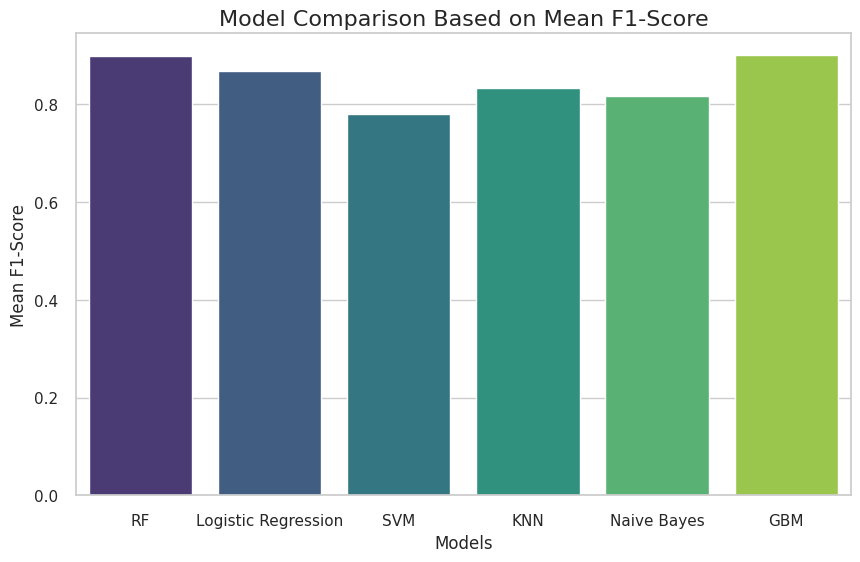

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title('Model Comparison Based on Mean F1-Score', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Mean F1-Score', fontsize=12)
plt.show()

=> Giống như kết quả so sánh ban đầu, GBM,RF đều có f1_score cao nhất .